In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import scipy as sp
import faraway.utils

In [3]:
stackloss = sm.datasets.stackloss.load_pandas().data
stackloss.head()

,STACKLOSS,AIRFLOW,WATERTEMP,ACIDCONC
0,42.0,80.0,27.0,89.0
1,37.0,80.0,27.0,88.0
2,37.0,75.0,25.0,90.0
3,28.0,62.0,24.0,87.0
4,18.0,62.0,22.0,87.0


**Description**
Data from the operation of a plant for the oxidation of ammonia to nitric acid, measured on 21 consecutive days.

**Format**</br>
stackloss is a dataframe with 21 observations on the following 4 numeric variables.</br>
*Air.Flow* </br>
    air flow to the plant.</br>
*Water.Temp*</br>
    cooling water inlet temperature.</br>
*Acid.Conc.*</br>
    acid concentration (percentage minus 50 times 10).</br>
*stack.loss*</br>
    ammonia lost (percentage times 10). This is generally used as the response variable.</br>

In [4]:
import faraway.utils
olsmod = smf.ols("STACKLOSS ~ AIRFLOW + WATERTEMP + ACIDCONC", stackloss).fit()
olsmod.sumary()

            coefs stderr tvalues pvalues
Intercept -39.920 11.896   -3.36  0.0038
AIRFLOW     0.716  0.135    5.31  0.0001
WATERTEMP   1.295  0.368    3.52  0.0026
ACIDCONC   -0.152  0.156   -0.97  0.3440

n=21 p=4 Residual SD=3.243 R-squared=0.91


In [5]:
%run utils.ipynb

(<Figure size 1440x504 with 2 Axes>,
 array([<AxesSubplot:xlabel='y.hat', ylabel='e.hat'>,
        <AxesSubplot:xlabel='y.hat', ylabel='sqrt(|e.hat|)'>], dtype=object))

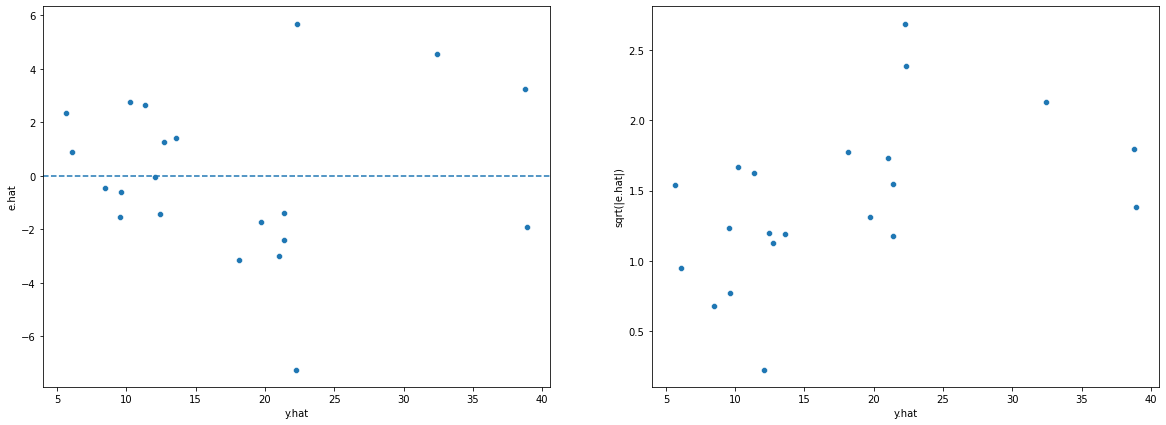

In [6]:
resid_yhat_plot(olsmod)

In [7]:
X = pd.DataFrame(olsmod.model.wexog, columns=olsmod.params.index)
y = olsmod.model.wendog
rlmod_huber = sm.RLM(y, X, M=sm.robust.norms.HuberT()).fit()
rlmod_huber.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      y   No. Observations:                   21
Model:                            RLM   Df Residuals:                       17
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 22 Aug 2022                                         
Time:                        19:35:01                                         
No. Iterations:                    19                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -41.0265      9.792     -4.190      0.000     -60.218     -21.835
AIRFLOW        0.8294      0.111      7.472      0.000       0.612       1.047
WATERTEMP      0.9261      0.303      3.057      0.002       0.332       1.520
ACIDCONC      -0.1278      0.129     -0.994      0.320      -0.380       0.124
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [8]:
rlmod_huber.weights[rlmod_huber.weights<1]

2     0.785813
3     0.504867
20    0.368092
dtype: float64

In [9]:
from statsmodels.regression.quantile_regression import QuantReg
rlmod = QuantReg(y, X).fit(q=0.5)
rlmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                      y   Pseudo R-squared:               0.7098
Model:                       QuantReg   Bandwidth:                       2.723
Method:                 Least Squares   Sparsity:                        5.498
Date:                Mon, 22 Aug 2022   No. Observations:                   21
Time:                        19:35:01   Df Residuals:                       17
                                        Df Model:                            3
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -39.6899     10.082     -3.937      0.001     -60.962     -18.418
AIRFLOW        0.8319      0.114      7.278      0.000       0.591       1.073
WATERTEMP      0.5739      0.312      1.840      0.083      -0.084       1.232
ACIDCONC      -0.0609      0.132     -0.460      0.652      -0.340       0.219
==============================================================================

The condition number is large, 1.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(<Figure size 1440x504 with 2 Axes>,
 array([<AxesSubplot:xlabel='y.hat', ylabel='e.hat'>,
        <AxesSubplot:xlabel='y.hat', ylabel='sqrt(|e.hat|)'>], dtype=object))

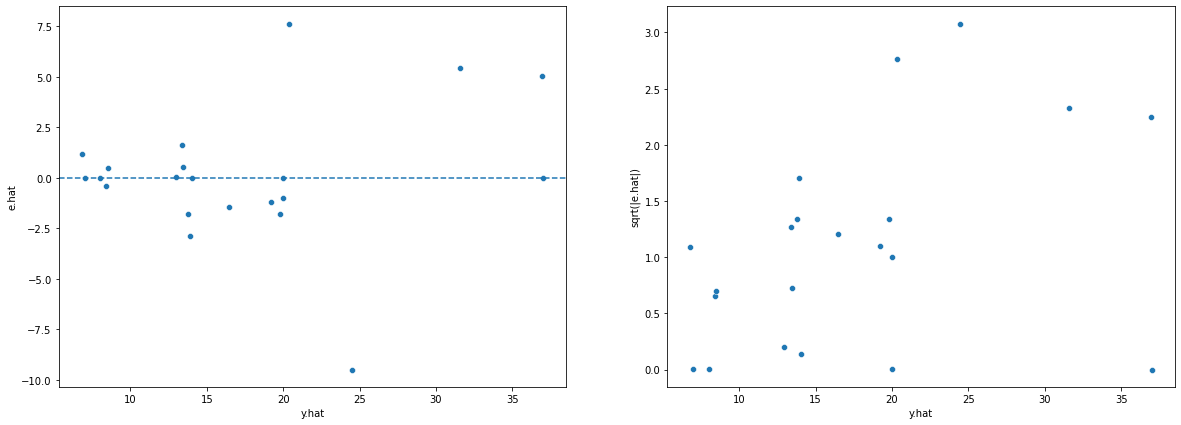

In [10]:
resid_yhat_plot(rlmod)

(<Figure size 1440x504 with 2 Axes>,
 array([<AxesSubplot:xlabel='y.hat', ylabel='e.hat'>,
        <AxesSubplot:xlabel='y.hat', ylabel='sqrt(|e.hat|)'>], dtype=object))

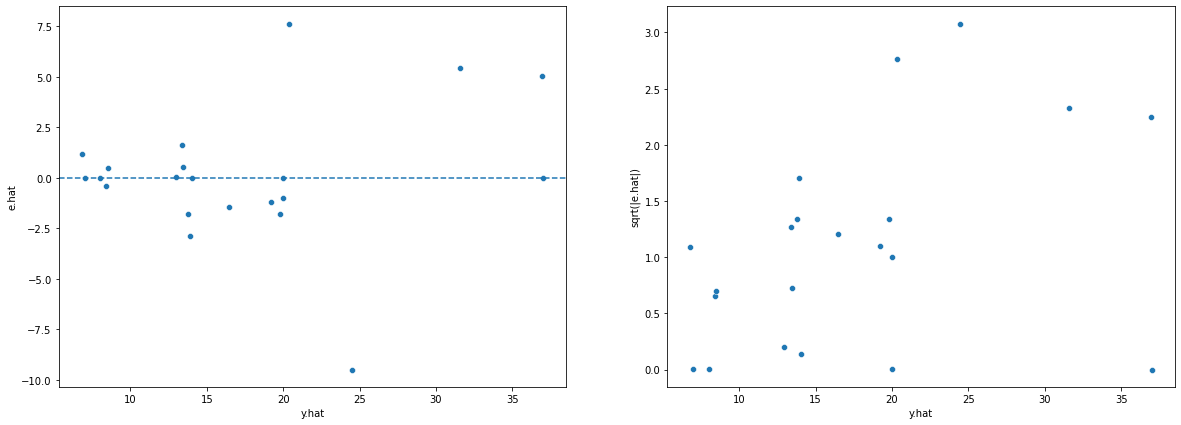

In [11]:
resid_yhat_plot(rlmod)

### Model Selection
Start with BE

In [17]:
%run utils.ipynb

In [18]:
backward_elimination(olsmod)

Start with:
            coefs stderr tvalues pvalues
Intercept -39.920 11.896   -3.36  0.0038
AIRFLOW     0.716  0.135    5.31  0.0001
WATERTEMP   1.295  0.368    3.52  0.0026
ACIDCONC   -0.152  0.156   -0.97  0.3440

n=21 p=4 Residual SD=3.243 R-squared=0.91

Remove:  ACIDCONC with pval: 0.34
            coefs stderr tvalues pvalues
Intercept -50.359  5.138   -9.80  0.0000
AIRFLOW     0.671  0.127    5.30  0.0000
WATERTEMP   1.295  0.367    3.52  0.0024

n=21 p=3 Residual SD=3.239 R-squared=0.91


(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7f3076661090>,
 ['ACIDCONC'])